# TELECOM CASE STUDY - SEGMENTATION-CLASSIFICATION

Model to predict a customer churn and analyse the churning and non-churning customers by using data from an 
internet connection company

    #1. Importing Libraries and dataframes

In [1805]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   
%pylab inline
plt.rcParams['figure.figsize'] = 11.7, 8.27
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 842.4x595.44 with 0 Axes>

In [1806]:
telecom_active = pd.read_excel('Case_study_data.xlsx', sheet_name = 0 )

In [1807]:
telecom_churn = pd.read_excel('Case_study_data.xlsx', sheet_name = 1 )

In [1808]:
telecom_active.head(3)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N


In [1809]:
telecom_churn.head(3)

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y


    #2. Analysis of data, data manipulation and data cleaning

# Active Customers

A. First Analyse and clean data for Active customers Dataset

In [1810]:
telecom_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          9998 non-null object
ACCOUNT_STATUS               9998 non-null object
FIRST_COMMUNICATION_DATE     9989 non-null datetime64[ns]
UPGRADE_DATE                 9989 non-null datetime64[ns]
SERVICE_ PLAN                8760 non-null object
MODEL                        9323 non-null object
SALES_CHANNEL                7093 non-null object
DIRECT_INDIRECT_CHANNEL      9954 non-null object
SALES_SOURCE                 9306 non-null object
COMPANY_SOURCE_NAME          9988 non-null object
FIRST_NAME                   9998 non-null object
LAST_NAME                    9998 non-null object
ADDRESS                      9945 non-null object
CITY                         9998 non-null object
STATE                        9977 non-null object
ZIPCODE                      9977 non-null object
EMAIL_ADDRESS                9979 non-null object
FEEDBACK                   

In [1811]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(telecom_active)

Number of variables,29
Number of observations,9999
Total Missing (%),0.0%
Total size in memory,2.2 MiB
Average record size in memory,232.0 B
Numeric,3
Categorical,23
Boolean,0
Date,2
Text (Unique),1
Rejected,0


    B. Dropping variables with high cardinality and with no importance

In [1812]:
telecom_active.drop(['ACCOUNT_STATUS', 'ADDRESS', 'CITY', 'COMPANY_SOURCE_NAME', 'DATE_OF_BIRTH', 'EMAIL_ADDRESS', 'FIRST_COMMUNICATION_DATE', 
'FIRST_NAME', 'LAST_NAME', 'ZIPCODE','STATE','SALES_SOURCE'], axis=1, inplace=True)

In [1813]:
telecom_active.head(3)

,SITE_ACCOUNT_NUMBER,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,2003-12-14,NaN,HN9000,Vars,Indirect,NaN,SPACEWAY3,Broadband Remote,0,HN7000 Upgrade,2.0,69,0,1.0,0.0,N
1,AMR-14837287,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,GOOD,HZN2-VER-4K,Spaceway,0,Retail,2.0,43,4,1.0,0.0,N
2,AMR-14837803,2004-03-17,Power150,HN9000,Call Center,Indirect,BAD,SM5-VER-15K,Broadband Remote,0,National Sales,2.0,58,4,1.0,0.0,N


--There is one row with index 9998 which has allvariables null so we drop that observation

In [1814]:
telecom_active.drop(9998, inplace=True)

-- Column Name - UPGRADE_DATE

In [1815]:
telecom_active['UPGRADED'] = telecom_active['UPGRADE_DATE'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [1816]:
telecom_active.drop('UPGRADE_DATE', axis=1, inplace=True)

-- New KPI Churn = 0 for active customers

In [1817]:
telecom_active['Churned'] = 0

# Churned Customers

In [1818]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(telecom_churn)

Number of variables,30
Number of observations,10000
Total Missing (%),0.0%
Total size in memory,2.3 MiB
Average record size in memory,240.0 B
Numeric,3
Categorical,23
Boolean,0
Date,3
Text (Unique),1
Rejected,0


    B. Dropping variables with high cardinality and with no importance

In [1819]:
telecom_churn.drop(['ACCOUNT_STATUS', 'CHURN_DATE', 'ADDRESS', 'CITY', 'COMPANY_SOURCE_NAME', 'DATE_OF_BIRTH', 'EMAIL_ADDRESS', 'FIRST_COMMUNICATION_DATE', 
'FIRST_NAME', 'LAST_NAME', 'ZIPCODE','STATE','SALES_SOURCE'], axis=1, inplace=True)

-- Column Name - UPGRADE_DATE

In [1820]:
telecom_churn['UPGRADED'] = telecom_churn['UPGRADE_DATE'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [1821]:
telecom_churn.drop('UPGRADE_DATE', axis=1, inplace=True)

-- New KPI Churn = 1 for churned customers

In [1822]:
telecom_churn['Churned'] = 1

#  Merging both active and churn datasets

In [1823]:
# Variable Service_Plan is different in both datasets so removing a space in active dataset

telecom_active=telecom_active.rename(columns={'SERVICE_ PLAN':'SERVICE_PLAN'})

In [1824]:
telecom_df = telecom_active.append(telecom_churn, ignore_index=True)

In [1825]:
telecom_df.tail()

,SITE_ACCOUNT_NUMBER,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,UPGRADED,Churned
19993,Q-94945717,Basic,HN9000,Call Centers,Indirect,GOOD,G28-HOR-16K,Spaceway,EXPRESS REPAIR BASIC,Direct,2.0,49,3,.,1.0,N,1,1
19994,Q-94977539,Professional Plus,DW6000,Retail/Others,Direct,NaN,G28-HOR-10K,Spaceway,EXPRESS REPAIR HOME WITH TERM,Direct,2.0,38,2,1,1.0,Y,1,1
19995,T000078824,Home,DW4000,Retail/Others,Indirect,BAD,SPACEWAY3,Broadband Remote,NaN,Dealer - Direct Order,2.0,67,8,0,0.0,NaN,0,1
19996,T000079618,Power15,DW6000,NaN,NaN,BAD,SPACEWAY3,Broadband Remote,NaN,Direct,1.0,63,0,.,NaN,NaN,1,1
19997,T000080092,Professional Plus,HN7000S,NaN,Indirect,BAD,SPACEWAY3,Broadband Remote,NaN,Direct,1.0,43,0,.,NaN,N,1,1


# Column Name - AGE

In [1826]:
telecom_df['AGE']= telecom_df['AGE'].replace('.', '1', regex=True)
telecom_df['AGE']= telecom_df['AGE'].replace('#REF!', '1', regex=True)
telecom_df['AGE']= telecom_df['AGE'].fillna('1')


In [1827]:
# Convert Age to numerical type

telecom_df['AGE'] = telecom_df['AGE'].astype('float64')

In [1828]:
telecom_df['AGE'].mean()

45.95864586458646

In [1829]:
telecom_df['AGE'] = telecom_df['AGE'].apply(lambda x: 56.0 if x==1.0 else x)

In [1830]:
# Binning the age variable to categorical

In [1831]:
telecom_df['AGECAT'] = pd.cut(telecom_df['AGE'], bins=[15, 35, 55,100], labels=['Young', "Middle", "Senior"])

In [1832]:
telecom_df['AGECAT'].value_counts()

Middle    8425
Senior    6351
Young     5222
Name: AGECAT, dtype: int64

In [1833]:
telecom_df.drop('AGE', axis=1, inplace=True)

In [1834]:
telecom_df.groupby('AGECAT')['SITE_ACCOUNT_NUMBER'].nunique()

AGECAT
Young     5222
Middle    8425
Senior    6351
Name: SITE_ACCOUNT_NUMBER, dtype: int64

# -- Removing all spaces and Treating missing values and replacing them by UNKNOWN so that moodel does not get biased
by replacing them by mode

In [1835]:
# Strip all spaces

In [1836]:
def Strip(x):
    x = x.str.strip()
    return x

telecom_df[telecom_df.columns.difference(['MARITAL_STATUS', 'UPGRADED', 'Churned', 'AGECAT', 'GENDER', 'PRESENCE_OF_CHILDREN', 'INCOME'])] = telecom_df[telecom_df.columns.difference(['MARITAL_STATUS','GENDER', 'PRESENCE_OF_CHILDREN','UPGRADED', 'Churned', 'AGECAT', 'INCOME'])].apply(lambda x: Strip(x))

In [1837]:
#Handling missings - Numerical
def Missing_imputation_num(x):
    x = x.fillna(-1)
    return x

telecom_df[['GENDER', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN']]=telecom_df[['GENDER', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN']].apply(lambda x: Missing_imputation_num(x))

In [1838]:
#Handling missings - Categorical
def Missing_imputation_cat(x):
    x = x.fillna('UNKNOWN')
    return x

telecom_df[['SITE_TYPE_DESC', 'SERVICE_PLAN', 'MODEL', 'SATELLITE', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL','COMPUTER_OWNER', 'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SALES_CHANNEL']]=telecom_df[['SITE_TYPE_DESC', 'SERVICE_PLAN', 'MODEL', 'SATELLITE', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL','COMPUTER_OWNER', 'DIRECT_INDIRECT_CHANNEL', 'FEEDBACK', 'SALES_CHANNEL']].apply(lambda x: Missing_imputation_cat(x))

-Treating missing value in INCOME separately

In [1839]:
telecom_df.INCOME = telecom_df.INCOME.apply(lambda x: 0 if pd.isnull(x) else x)

In [1840]:
# Convert all num var to categorical

In [1841]:
telecom_df[['GENDER', 'INCOME', 'PRESENCE_OF_CHILDREN',]] =telecom_df[['GENDER', 'INCOME','PRESENCE_OF_CHILDREN',]].astype('object')

In [1842]:
telecom_df.apply(lambda x: x.isnull().sum())

SITE_ACCOUNT_NUMBER          0
SERVICE_PLAN                 0
MODEL                        0
SALES_CHANNEL                0
DIRECT_INDIRECT_CHANNEL      0
FEEDBACK                     0
SATELLITE                    0
SITE_TYPE_DESC               0
WARRANTY_NAME                0
MOST_RECENT_SALES_CHANNEL    0
GENDER                       0
INCOME                       0
MARITAL_STATUS               0
PRESENCE_OF_CHILDREN         0
COMPUTER_OWNER               0
UPGRADED                     0
Churned                      0
AGECAT                       0
dtype: int64

-- Treating some variables to make them more efficient and understandable

# Column - MODEL

In [1843]:
# Model has one value UNK which is unknown so replacing it with UNKNOWN

In [1844]:
telecom_df.MODEL = telecom_df.MODEL.apply(lambda x: 'UNKNOWN' if x=='UNK' else x)

# Column - DIRECT_INDIRECT_CHANNEL

In [1845]:
# Replacing 0 with UNKNOWN

In [1846]:
telecom_df.DIRECT_INDIRECT_CHANNEL = telecom_df.DIRECT_INDIRECT_CHANNEL.apply(lambda x: 'UNKNOWN' if x==0 else x)

# Column - SATELLITE

In [1847]:
# Replacing 0 with UNKNOWN

In [1848]:
telecom_df.SATELLITE = telecom_df.SATELLITE.apply(lambda x: 'UNKNOWN' if x==0 else x)

In [1849]:
# SATELLITE has high cardinality so will reduce the values by categoriing them

In [1850]:
telecom_df[['SATELLITE']] = telecom_df[['SATELLITE']].replace(['AM6-HOR-21K','AM9-HOR-21K', 'AM32-HOR-7K', 'AM9-HOR-17K', 'AM32-HOR-19K', 'AM9-HOR-19K','AMC-HOR-10K'], "AM-HOR-SERIES", regex=True)

In [1851]:
telecom_df[['SATELLITE']] = telecom_df[['SATELLITE']].replace(['AM9-VER-2K', 'AM9-VER-22K','AMC-VER-5K'], "AM-VER-SERIES", regex=True)

In [1852]:
telecom_df[['SATELLITE']] = telecom_df[['SATELLITE']].replace(['G16-HOR-2K', 'G16-HOR-8K', 'G17-HOR-2K', 'G17-HOR-6K', 'G26-HOR-14K', 'G28-HOR-10K', 'G28-HOR-16K'], "G-HOR-SERIES", regex=True)

In [1853]:
telecom_df[['SATELLITE']] = telecom_df[['SATELLITE']].replace(['G16-VER-15K', 'G16-VER-2K', 'G16-VER-1K', 'G16-VER-21K', 'G3C-VER-21K', 'G3C-VER-9K', 'G3C-VER-24K'], "G-VER-SERIES", regex=True)

In [1854]:
telecom_df[['SATELLITE']] = telecom_df[['SATELLITE']].replace(['HZN-HOR-19K', 'HZN-HOR-8K'], "HZN-HOR-SERIES", regex=True)

In [1855]:
telecom_df[['SATELLITE']] = telecom_df[['SATELLITE']].replace(['HZN-VER-11K', 'HZN-VER-6K', 'HZN-VER-23K','HZN2-VER-4K', 'HZN2-VER-5K', 'HZN2-VER-8K'], "HZN-VER-SERIES", regex=True)

In [1856]:
telecom_df[['SATELLITE']] = telecom_df[['SATELLITE']].replace(['SM5-HOR-14K', 'SM5-HOR-6K','SM6-HOR-10K', 'SM6-HOR-12K', 'SM6-HOR-13K'], "SM-HOR-SERIES", regex=True)

In [1857]:
telecom_df[['SATELLITE']] = telecom_df[['SATELLITE']].replace(['SM5-VER-15K', 'SM5-VER-1K', 'SM5-VER-7K', 'SM5-VER-5K','SM6-VER-2K'], "SM-VER-SERIES", regex=True)

In [1858]:
telecom_df.groupby('SATELLITE')['SITE_ACCOUNT_NUMBER'].nunique()

SATELLITE
AM-HOR-SERIES     1718
AM-VER-SERIES      812
G-HOR-SERIES      2941
G-VER-SERIES      1997
HZN-HOR-SERIES     701
HZN-VER-SERIES     885
SM-HOR-SERIES     1650
SM-VER-SERIES     3199
SPACEWAY3         3845
UNKNOWN           2250
Name: SITE_ACCOUNT_NUMBER, dtype: int64

# Column - MARITAL_STATUS

--Replacing . with  -1

In [1859]:
telecom_df.MARITAL_STATUS =telecom_df.MARITAL_STATUS.apply(lambda x: -1 if x=='.' else x)

In [1860]:
telecom_df.MARITAL_STATUS.value_counts()

 0.0    7707
 1.0    7351
-1.0    3940
 2.0    1000
Name: MARITAL_STATUS, dtype: int64

In [1861]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 18 columns):
SITE_ACCOUNT_NUMBER          19998 non-null object
SERVICE_PLAN                 19998 non-null object
MODEL                        19998 non-null object
SALES_CHANNEL                19998 non-null object
DIRECT_INDIRECT_CHANNEL      19998 non-null object
FEEDBACK                     19998 non-null object
SATELLITE                    19998 non-null object
SITE_TYPE_DESC               19998 non-null object
WARRANTY_NAME                19998 non-null object
MOST_RECENT_SALES_CHANNEL    19998 non-null object
GENDER                       19998 non-null object
INCOME                       19998 non-null object
MARITAL_STATUS               19998 non-null float64
PRESENCE_OF_CHILDREN         19998 non-null object
COMPUTER_OWNER               19998 non-null object
UPGRADED                     19998 non-null int64
Churned                      19998 non-null int64
AGECAT                   

In [1862]:
telecom_df.isnull().any()

SITE_ACCOUNT_NUMBER          False
SERVICE_PLAN                 False
MODEL                        False
SALES_CHANNEL                False
DIRECT_INDIRECT_CHANNEL      False
FEEDBACK                     False
SATELLITE                    False
SITE_TYPE_DESC               False
WARRANTY_NAME                False
MOST_RECENT_SALES_CHANNEL    False
GENDER                       False
INCOME                       False
MARITAL_STATUS               False
PRESENCE_OF_CHILDREN         False
COMPUTER_OWNER               False
UPGRADED                     False
Churned                      False
AGECAT                       False
dtype: bool

Since we have multiple categorical varibles - creating dummies will cause un-managable increase in columns
So I am Encoding Categorical Features to have a managable datasize

In [1863]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

telecom_df['SALES_CHANNEL'] = encoder.fit_transform(telecom_df['SALES_CHANNEL'])
telecom_df['DIRECT_INDIRECT_CHANNEL'] = encoder.fit_transform(telecom_df['DIRECT_INDIRECT_CHANNEL'])
telecom_df['FEEDBACK'] = encoder.fit_transform(telecom_df['FEEDBACK'])
telecom_df['SITE_TYPE_DESC'] = encoder.fit_transform(telecom_df['SITE_TYPE_DESC'])
telecom_df['INCOME'] = encoder.fit_transform(telecom_df['INCOME'])
telecom_df['COMPUTER_OWNER'] = encoder.fit_transform(telecom_df['COMPUTER_OWNER'])
telecom_df['SERVICE_PLAN_'] = encoder.fit_transform(telecom_df['SERVICE_PLAN'])
telecom_df['MODEL'] = encoder.fit_transform(telecom_df['MODEL'])
telecom_df['MOST_RECENT_SALES_CHANNEL'] = encoder.fit_transform(telecom_df['MOST_RECENT_SALES_CHANNEL'])
telecom_df['SATELLITE'] = encoder.fit_transform(telecom_df['SATELLITE'])
telecom_df['WARRANTY_NAME'] = encoder.fit_transform(telecom_df['WARRANTY_NAME'])
telecom_df['AGECAT'] = encoder.fit_transform(telecom_df['AGECAT'])

In [1866]:
telecom_df['SERVICE_PLAN'] = encoder.fit_transform(telecom_df['SERVICE_PLAN'])

In [1869]:
telecom_df['GENDER'] = encoder.fit_transform(telecom_df['GENDER'])
telecom_df['MARITAL_STATUS'] = encoder.fit_transform(telecom_df['MARITAL_STATUS'])
telecom_df['PRESENCE_OF_CHILDREN'] = encoder.fit_transform(telecom_df['PRESENCE_OF_CHILDREN'])
telecom_df['INCOME'] = encoder.fit_transform(telecom_df['INCOME'])


In [1875]:
telecom_df.drop('SITE_ACCOUNT_NUMBER', axis=1, inplace=True)

In [1876]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

In [1877]:
#Splitting the data
feature_columns = telecom_df.columns.difference( ['Churned'] )

In [1878]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( telecom_df[feature_columns],
                                                  telecom_df['Churned'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [1879]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1881]:
#Predicting on train dataset
tele_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': logreg.predict( train_X ) } )

In [5]:
from sklearn.model_selection import cross_val_score
cross_val_score?

In [1882]:
score = metrics.accuracy_score( tele_train_pred.actual, tele_train_pred.predicted )
round( float(score), 2 )

0.82

In [1883]:
#Predicting on test data
tele_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [1884]:
score = metrics.accuracy_score( tele_test_pred.actual, tele_test_pred.predicted )
round( float(score), 2 )

0.81

In [1885]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [1886]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( tele_test_pred.actual,
                            tele_test_pred.predicted, [1,0] )
cm

array([[1567,  459],
       [ 312, 1662]], dtype=int64)

Text(0.5,12.5,'Predicted label')

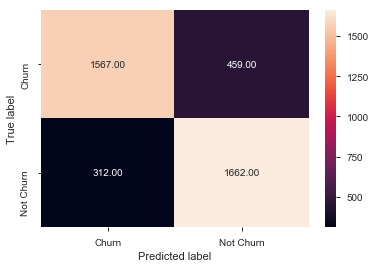

In [1887]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [1888]:
telecom_df.head()

,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,FEEDBACK,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,UPGRADED,Churned,AGECAT,SERVICE_PLAN_
0,11,5,6,1,2,8,0,11,11,2,0,2,1,0,1,0,1,11
1,6,4,4,1,1,5,1,11,15,2,4,2,1,0,1,0,0,6
2,5,5,0,1,0,7,0,11,14,2,4,2,1,0,1,0,1,5
3,5,2,4,0,2,8,1,11,8,0,6,2,2,1,1,0,2,5
4,3,4,0,1,1,9,0,11,3,1,7,1,1,1,1,0,0,3
